<a href="https://colab.research.google.com/github/ahmeddtarekk7769/Data_Science/blob/main/ai_milestone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
blastchar_telco_customer_churn_path = kagglehub.dataset_download('blastchar/telco-customer-churn')

print('Data source import complete.')


Using Colab cache for faster access to the 'telco-customer-churn' dataset.
Data source import complete.


In [100]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')


df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [102]:
df.shape

(7043, 21)

In [103]:
non_unique_cols = [col for col in df.columns if df[col].is_unique]

print("Non-unique columns in the DataFrame:")
print(non_unique_cols)

Non-unique columns in the DataFrame:
['customerID']


In [104]:
df = df.drop(columns= non_unique_cols)

In [105]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [106]:
df.shape

(7043, 20)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [108]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [109]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [110]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [111]:
df['TotalCharges'].describe(include='all')

,TotalCharges
count,7043
unique,6531
top,
freq,11


In [112]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [113]:
df['TotalCharges'].isnull().sum()

np.int64(11)

In [114]:
df = df.dropna(subset=['TotalCharges'])

In [115]:
df['TotalCharges'].describe()

,TotalCharges
count,7032.000000
mean,2283.300441
std,2266.771362
min,18.800000
25%,401.450000
50%,1397.475000
75%,3794.737500
max,8684.800000


In [116]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [117]:
df['Contract'].value_counts()

,count
Contract,
Month-to-month,3875
Two year,1685
One year,1472


In [118]:
df['Contract'] = df['Contract'].replace({'Two year': 'Yearly'})

In [119]:
df['Contract'] = df['Contract'].replace({'One year': 'Yearly'})

In [120]:
df['Contract'].value_counts()

,count
Contract,
Month-to-month,3875
Yearly,3157


In [121]:
df['Contract'] = df['Contract'].replace({'Yearly': '1'})
df['Contract'] = df['Contract'].replace({'Month-to-month': '0'})


In [122]:
df['TechSupport'].value_counts()

,count
TechSupport,
No,3472
Yes,2040
No internet service,1520


In [123]:
df['TechSupport'] = df['TechSupport'].replace({'No internet service': 'No'})

In [124]:
df['TechSupport'].value_counts()

,count
TechSupport,
No,4992
Yes,2040


In [125]:
df['SeniorCitizen'].value_counts()

,count
SeniorCitizen,
0,5890
1,1142


In [126]:
df['TechSupport'] = df['TechSupport'].map({'Yes': 1, 'No': 0})
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [127]:
df['MultipleLines'].value_counts()

,count
MultipleLines,
No,3385
Yes,2967
No phone service,680


In [128]:
df['MultipleLines'] = df['MultipleLines'].replace({'No phone service': 'No'})

In [129]:
df['MultipleLines'] = df['MultipleLines'].map({'Yes': 1, 'No': 0})

In [130]:
df['InternetService'].value_counts()

,count
InternetService,
Fiber optic,3096
DSL,2416
No,1520


In [131]:
df['InternetService'] = df['InternetService'].replace({'Fiber optic': 'Yes'})

In [132]:
df['InternetService'] = df['InternetService'].replace({'DSL': 'Yes'})

In [133]:
df['InternetService'].value_counts()

,count
InternetService,
Yes,5512
No,1520


In [134]:
df['InternetService'] = df['InternetService'].map({'Yes': 1, 'No': 0})

In [135]:

df['PhoneService'].value_counts()

,count
PhoneService,
Yes,6352
No,680


In [136]:
df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No': 0})

In [137]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,0,0,1,No,Yes,No,0,No,No,0,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,1,0,1,Yes,No,Yes,0,No,No,1,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,1,0,1,Yes,Yes,No,0,No,No,0,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,0,0,1,Yes,No,Yes,1,No,No,1,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,1,0,1,No,No,No,0,No,No,0,Yes,Electronic check,70.70,151.65,1


In [138]:
df['OnlineBackup'].value_counts()


,count
OnlineBackup,
No,3087
Yes,2425
No internet service,1520


In [139]:
df['OnlineBackup'] = df['OnlineBackup'].replace({'No internet service': 'No'})

In [140]:
df['OnlineBackup'] = df['OnlineBackup'].map({'Yes': 1, 'No': 0})

In [141]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,0,0,1,No,1,No,0,No,No,0,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,1,0,1,Yes,0,Yes,0,No,No,1,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,1,0,1,Yes,1,No,0,No,No,0,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,0,0,1,Yes,0,Yes,1,No,No,1,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,1,0,1,No,0,No,0,No,No,0,Yes,Electronic check,70.70,151.65,1


In [142]:
df = df.drop(columns=[col for col in df.columns if col not in ['SeniorCitizen', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService','Contract', 'OnlineBackup', 'TechSupport', 'Contract', 'MonthlyCharges', 'TotalCharges', 'Churn']])


In [143]:
df.head()

,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineBackup,TechSupport,Contract,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0,1,1,0,0,29.85,29.85,0
1,0,34,1,0,1,0,0,1,56.95,1889.50,0
2,0,2,1,0,1,1,0,0,53.85,108.15,1
3,0,45,0,0,1,0,1,1,42.30,1840.75,0
4,0,2,1,0,1,0,0,0,70.70,151.65,1


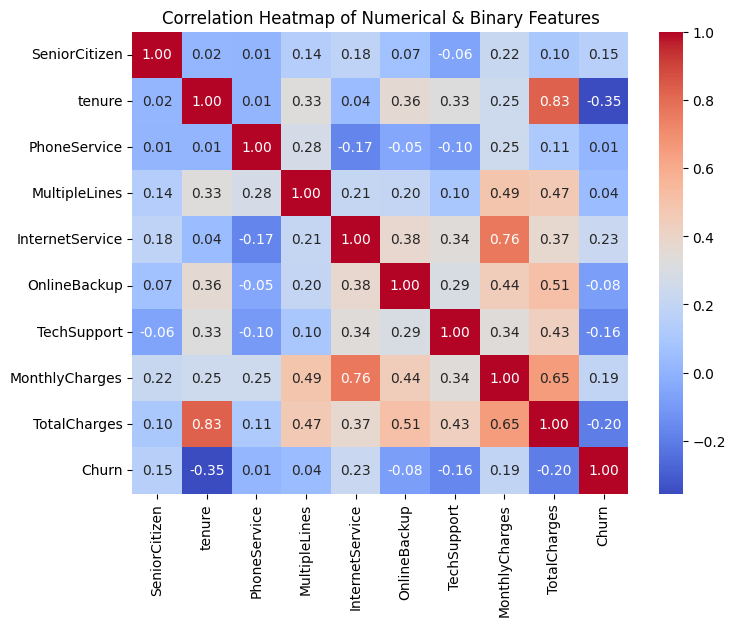

In [144]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical & Binary Features')
plt.show()

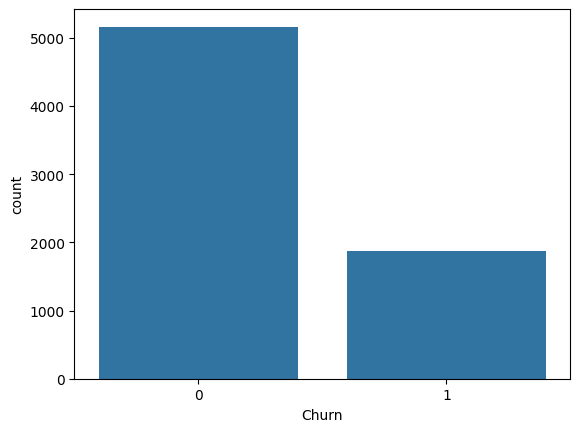

In [145]:
sns.countplot(x='Churn', data=df)
plt.show()

Overall Transition Matrix:
           Active   Churned
Active   0.734215  0.265785
Churned  0.050000  0.950000


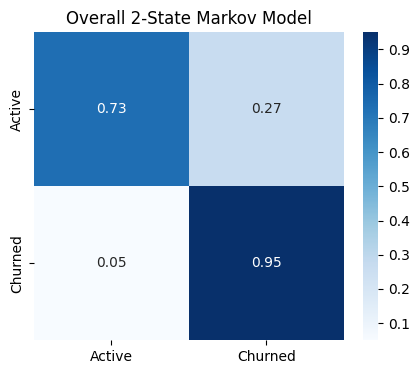

In [146]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Overall 2-state Markov probabilities
states = ['Active', 'Churned']
p_churn = df['Churn'].mean()
p_active = 1 - p_churn

transition_matrix = pd.DataFrame(
    [[p_active, p_churn],
     [0.05, 0.95]],  # 5% chance churned return
    columns=states,
    index=states
)

print("Overall Transition Matrix:")
print(transition_matrix)

plt.figure(figsize=(5,4))
sns.heatmap(transition_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title("Overall 2-State Markov Model")
plt.show()